In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
adv = pd.DataFrame({
    "TV": [230.1, 44.5, 17.2, 151.5, 180.8],
    "Sales":[22.1, 10.4, 9.3, 18.5, 12.9]
}
)

adv

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


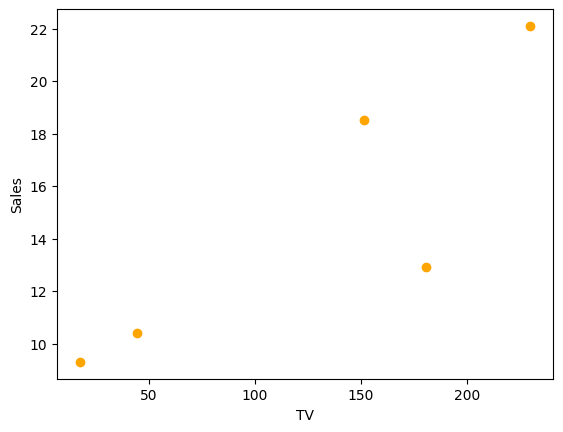

In [6]:
plt.scatter(
    x = adv['TV'],
    y = adv["Sales"],
    color = "orange"
)

plt.xlabel("TV")
plt.ylabel("Sales");

Salvar os campos requeridos em variáveis X e Y

In [7]:
X = adv['TV']
Y = adv['Sales']

Regressão Linear com Numpy

Você pode usar a função np.polyfit(x, y, deg) para ajustar um polinômio de grau deg aos pontos $(x, y)$, minimizando a soma dos erros quadráticos. Você pode ler mais na documentação. Tomando deg = 1, você pode obter a inclinação m e o intercepto b da linha de regressão linear.

In [8]:
m_numpy, b_numpy = np.polyfit(X, Y, 1)

print(f"Linear regression with NumPy. Slope: {m_numpy}. Intercept: {b_numpy}")

Linear regression with NumPy. Slope: 0.05176182092143307. Intercept: 8.179089512586723


*Observação*: A [documentação do NumPy](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) sugere o uso do método de classe [`Polynomial.fit`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.fit.html#numpy.polynomial.polynomial.Polynomial.fit) como recomendado para novos códigos, pois é numericamente mais estável. No entanto, neste exemplo simples, você pode continuar usando a função `np.polyfit` por questões de simplicidade.

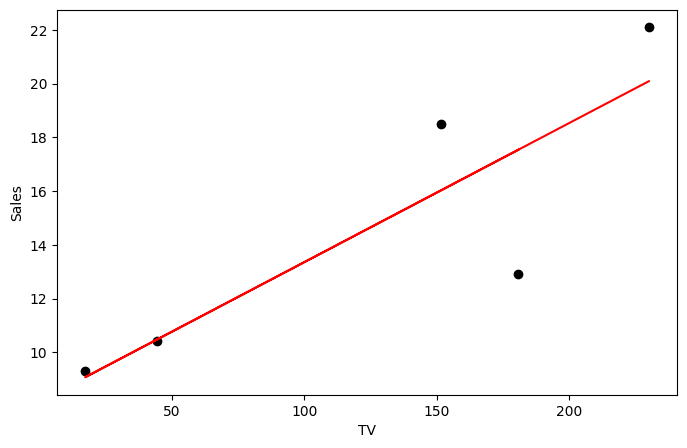

In [17]:
def plot_linear_regression(X, Y, x_label, y_label, m, b, X_pred=np.array([]), Y_pred=np.array([])):
    fig, ax = plt.subplots(1,1,figsize=(8,5))

    ax.plot(X, Y, 'o', color='black')   # Primeiro Gráfico de dispersão
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    
    ax.plot(X, m*X + b, color='red') # Regressão Linear
    
    ax.plot(X_pred, Y_pred, 'o', color='blue', markersize=8) # Previsão, por enquanto vazia, pq vamos calcular em outro momento
    
plot_linear_regression(X, Y, 'TV', 'Sales', m_numpy, b_numpy)

In [18]:
def pred_numpy(m, b, X):
    """
    Calcula a previsão (Y) para uma função linear de primeiro grau.

    Parâmetros:
    - m (float): Inclinação da linha de regressão.
    - b (float): Intercepto da linha de regressão.
    - X (array-like): Valores de entrada para os quais a previsão será calculada.

    Retorna:
    Um array contendo as previsões correspondentes para cada valor em X.

    Exemplo:
    >>> pred_numpy(2, 3, [1, 2, 3])
    [5, 7, 9]
    """
    Y = m * X + b
    return Y


In [21]:
X_pred = np.array([50, 120, 175])
Y_pred_numpy = pred_numpy(m_numpy, b_numpy, X_pred)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using NumPy linear regression:\n{Y_pred_numpy}")

TV marketing expenses:
[ 50 120 175]
Predictions of sales using NumPy linear regression:
[10.76718056 14.39050802 17.23740817]


Agora vamos plotar a previsão em pontos azuis, no gráfico anterior

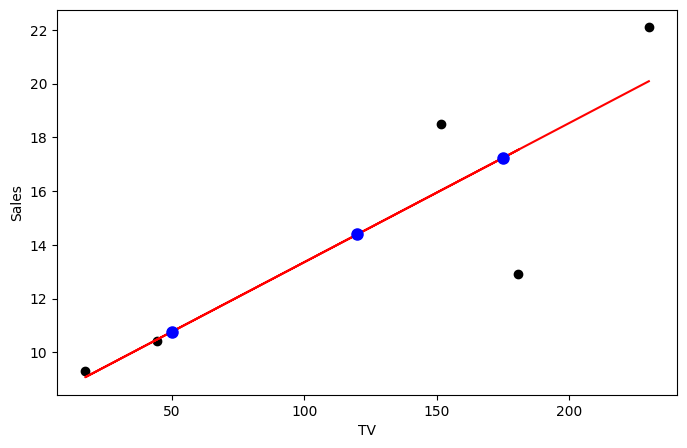

In [22]:
plot_linear_regression(X, Y, 'TV', 'Sales', m_numpy, b_numpy, X_pred, Y_pred_numpy)